# Preliminary Data Analysis and Visualization

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Washington Post Data Analysis and Visualization
Police fatality data collected by the Washington Post can be found at https://github.com/washingtonpost/data-police-shootings

In [3]:
WP = pd.read_csv("Data/fatal-police-shootings-data.csv")

In [4]:
WP.size # number of observations in the dataset

75586

In [5]:
WP.columns # names of the columns/labels in the dataframe

Index(['id', 'name', 'date', 'manner_of_death', 'armed', 'age', 'gender',
       'race', 'city', 'state', 'signs_of_mental_illness', 'threat_level',
       'flee', 'body_camera'],
      dtype='object')

In [6]:
WP.dtypes # types of the labels in the dataframe

id                           int64
name                        object
date                        object
manner_of_death             object
armed                       object
age                        float64
gender                      object
race                        object
city                        object
state                       object
signs_of_mental_illness       bool
threat_level                object
flee                        object
body_camera                   bool
dtype: object

In [7]:
WP.head(10) # first ten entries

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False
5,11,Kenneth Joe Brown,2015-01-04,shot,gun,18.0,M,W,Guthrie,OK,False,attack,Not fleeing,False
6,13,Kenneth Arnold Buck,2015-01-05,shot,gun,22.0,M,H,Chandler,AZ,False,attack,Car,False
7,15,Brock Nichols,2015-01-06,shot,gun,35.0,M,W,Assaria,KS,False,attack,Not fleeing,False
8,16,Autumn Steele,2015-01-06,shot,unarmed,34.0,F,W,Burlington,IA,False,other,Not fleeing,True
9,17,Leslie Sapp III,2015-01-06,shot,toy weapon,47.0,M,B,Knoxville,PA,False,attack,Not fleeing,False


In [8]:
WP["age"].describe() # descriptive statistics on the age data

count    5159.000000
mean       37.127544
std        13.111684
min         6.000000
25%        27.000000
50%        35.000000
75%        46.000000
max        91.000000
Name: age, dtype: float64

In [43]:
zero_to_twelve = 0
thirteen_to_nineteen = 0
twenties = 0
thirties = 0
forties = 0
fifties = 0
sixties = 0
seventies = 0
eighties = 0
nineties = 0

for item in WP["age"]:
    if 0 <= item <= 12:
        zero_to_twelve += 1
    if 13 <= item <= 19:
        thirteen_to_nineteen +=1
    if 20 <= item <= 29:
        twenties += 1
    if 30 <= item <= 39:
        thirties += 1
    if 40 <= item <= 49:
        forties += 1
    if 50 <= item <= 59:
        fifties += 1
    if 60 <= item <= 69:
        sixties += 1
    if 70 <= item <= 79:
        seventies += 1
    if 80 <= item <= 89:
        eighties += 1
    if 90 <= item <= 99:
        nineties += 1

WP_age_dict = {"0-12": zero_to_twelve, "13-19": thirteen_to_nineteen, "20-29": twenties, "30-39": thirties, \
               "40-49": forties, "50-59": fifties, "60-69": sixties, "70-79" : seventies, "80-89": eighties, 
               "90-99": nineties}
WP_age_dict

{'0-12': 3,
 '13-19': 274,
 '20-29': 1417,
 '30-39': 1551,
 '40-49': 959,
 '50-59': 633,
 '60-69': 242,
 '70-79': 63,
 '80-89': 16,
 '90-99': 1}

Text(0.5,1,'Frequency of Age')

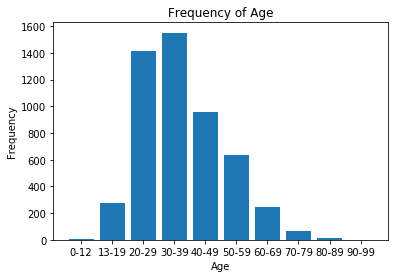

In [45]:
keys = WP_age_dict.keys()
values = WP_age_dict.values()
plt.bar(keys, values)
plt.xlabel("Age")
plt.ylabel('Frequency')
plt.title('Frequency of Age')

In [52]:
3+274+1417+1551+959+633+242+63+16+1

5159

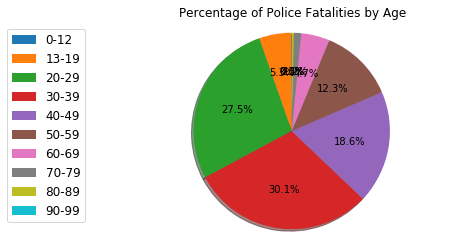

In [46]:
labels = '0-12', '13-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89', '90-99'
total = 3+274+1417+1551+959+633+242+63+16+1
sizes = [3, 274, 1417, 1551, 959, 633, 242, 63, 16, 1]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.legend(labels, loc='best', bbox_to_anchor=(-0.1, 1.),
           fontsize=12)
plt.title('Percentage of Police Fatalities by Age')
plt.show()

In [23]:
WP_manner = WP['manner_of_death'].value_counts()
WP_manner

shot                5129
shot and Tasered     270
Name: manner_of_death, dtype: int64

In [29]:
manner = ["shot", "shot & tasered"]
manner_num = [5129, 270]

Text(0.5,1,'Frequency of Manner of Death')

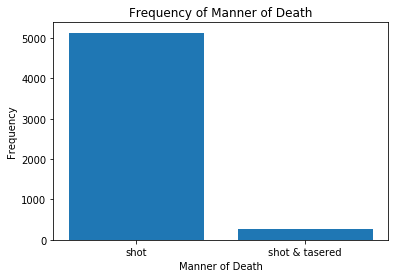

In [31]:
plt.bar(manner, manner_num)
plt.xlabel("Manner of Death")
plt.ylabel('Frequency')
plt.title('Frequency of Manner of Death')

In [9]:
WP_armed = WP['armed'].value_counts().head(15)
WP_armed

gun               3051
knife              791
unarmed            353
toy weapon         184
undetermined       162
vehicle            139
unknown weapon      79
machete             44
Taser               26
ax                  24
sword               22
baseball bat        18
gun and knife       17
hammer              15
screwdriver         13
Name: armed, dtype: int64

([0, 1, 2, 3, 4, 5, 6], <a list of 7 Text xticklabel objects>)

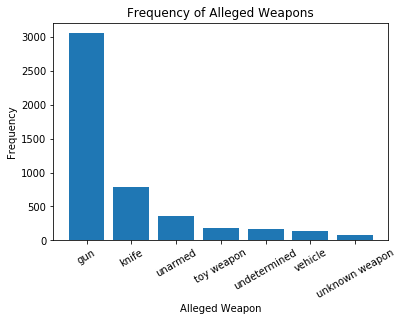

In [38]:
# This is a plot for weapons used at a frequency of 50 or greater
armed = ["gun", "knife", "unarmed", "toy weapon", "undetermined", "vehicle", "unknown weapon"]
armed_num = [3051, 791, 353, 184, 162, 139, 79]

plt.bar(armed, armed_num)
plt.xlabel("Alleged Weapon")
plt.ylabel('Frequency')
plt.title('Frequency of Alleged Weapons')
plt.xticks(rotation=30)

In [41]:
WP_gender = WP['gender'].value_counts()
WP_gender

M    5160
F     237
Name: gender, dtype: int64

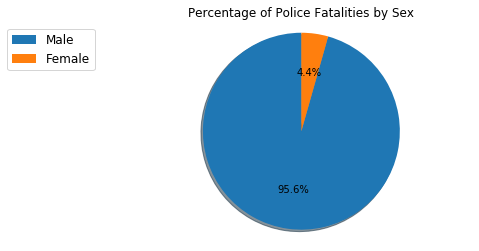

In [15]:
# This is a pie chart for sex

labels = "Male", "Female"
sizes = [0.956086715, 0.0439132285]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.legend(labels, loc='best', bbox_to_anchor=(-0.1, 1.),
           fontsize=12)
plt.title('Percentage of Police Fatalities by Sex')
plt.show()

In [44]:
WP_race = WP['race'].value_counts()
WP_race

W    2474
B    1292
H     900
A      93
N      78
O      48
Name: race, dtype: int64

([0, 1, 2, 3, 4, 5], <a list of 6 Text xticklabel objects>)

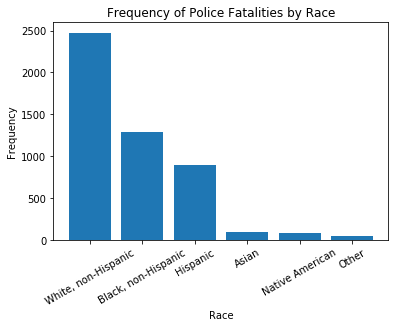

In [46]:
# This is a bar graph for race
race = ["White, non-Hispanic", "Black, non-Hispanic", "Hispanic", "Asian", "Native American", "Other"]
race_num = [2474, 1292, 900, 93, 78, 48]

plt.bar(race, race_num)
plt.xlabel("Race")
plt.ylabel('Frequency')
plt.title('Frequency of Police Fatalities by Race')
plt.xticks(rotation=30)

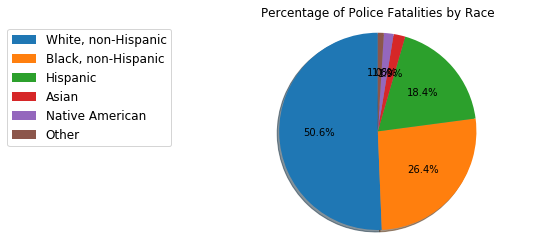

In [16]:
# This is a pie chart for race

labels = ["White, non-Hispanic", "Black, non-Hispanic", "Hispanic", "Asian", "Native American", "Other"]
sizes = [0.506448311, 0.264483112, 0.184237462, 0.019037871, 0.015967247, 0.009825998]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.legend(labels, loc='best', bbox_to_anchor=(-0.1, 1.),
           fontsize=12)
plt.title('Percentage of Police Fatalities by Race')
plt.show()

In [47]:
WP_state = WP['state'].value_counts()
WP_state

CA    795
TX    480
FL    349
AZ    253
CO    194
GA    181
OK    164
NC    156
OH    155
WA    152
MO    139
TN    138
LA    109
PA    108
NM    105
AL    104
IL    103
NY    100
NV     96
IN     95
KY     95
VA     95
WI     91
OR     88
SC     88
AR     82
MD     79
MI     78
NJ     68
MS     66
MN     61
UT     60
WV     54
KS     49
ID     41
AK     39
MA     35
IA     32
MT     31
HI     30
NE     24
ME     22
CT     21
SD     17
WY     14
DE     13
NH     13
DC     13
ND     11
VT      9
RI      4
Name: state, dtype: int64

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17],
 <a list of 18 Text xticklabel objects>)

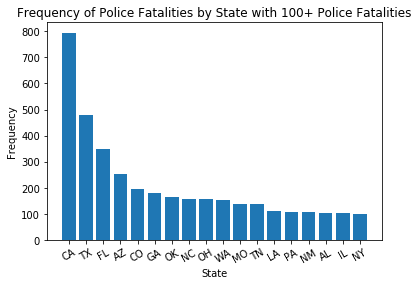

In [48]:
# This is a bar graph for states with 100 or more police fatalities
state = ["CA", "TX", "FL", "AZ", "CO", "GA", "OK", "NC", "OH", "WA", "MO", "TN", "LA", "PA", "NM", "AL", "IL", "NY"]
state_num = [795, 480, 349, 253, 194, 181, 164, 156, 155, 152, 139, 138, 109, 108, 105, 104, 103, 100]

plt.bar(state, state_num)
plt.xlabel("State")
plt.ylabel('Frequency')
plt.title('Frequency of Police Fatalities by State with 100+ Police Fatalities')
plt.xticks(rotation=30)

In [49]:
WP_illness = WP['signs_of_mental_illness'].value_counts()
WP_illness

False    4185
True     1214
Name: signs_of_mental_illness, dtype: int64

([0, 1], <a list of 2 Text xticklabel objects>)

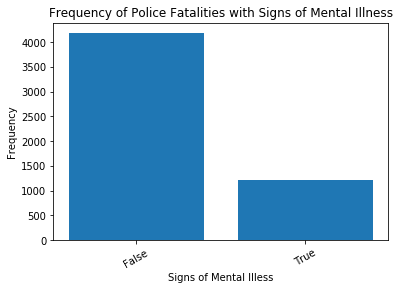

In [50]:
# This is a bar graph for signs of mental illness
illness = ["False", "True"]
illness_num = [4185, 1214]

plt.bar(illness, illness_num)
plt.xlabel("Signs of Mental Illess")
plt.ylabel('Frequency')
plt.title('Frequency of Police Fatalities with Signs of Mental Illness')
plt.xticks(rotation=30)

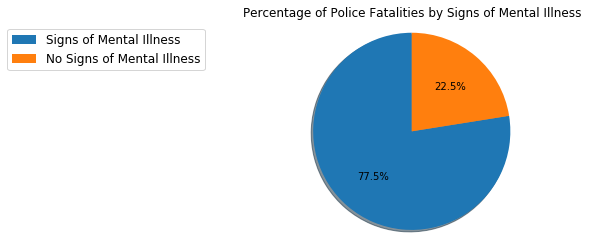

In [13]:
# This is a pie chart for the mental illness column

labels = "Signs of Mental Illness", "No Signs of Mental Illness"
sizes = [4185/(4185+1214), 1214/(4185+1214)]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.legend(labels, loc='best', bbox_to_anchor=(-0.1, 1.),
           fontsize=12)
plt.title('Percentage of Police Fatalities by Signs of Mental Illness')
plt.show()

In [51]:
WP_threat = WP['threat_level'].value_counts()
WP_threat

attack          3484
other           1677
undetermined     238
Name: threat_level, dtype: int64

([0, 1, 2], <a list of 3 Text xticklabel objects>)

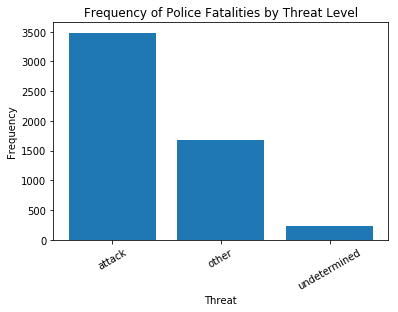

In [52]:
# This is a bar graph for threat level
threat = ["attack", "other", "undetermined"]
threat_num = [3484, 1677, 238]

plt.bar(threat, threat_num)
plt.xlabel("Threat")
plt.ylabel('Frequency')
plt.title('Frequency of Police Fatalities by Threat Level')
plt.xticks(rotation=30)

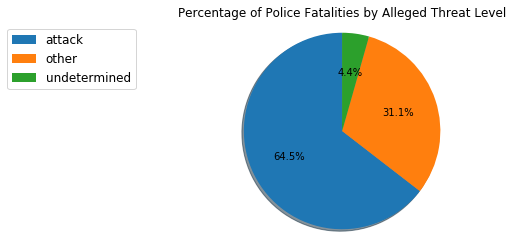

In [17]:
# This is a pie chart for the threat level column

labels = ["attack", "other", "undetermined"]
sizes = [3484/(3484+1677+238), 1677/(3484+1677+238), 238/(3484+1677+238)]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.legend(labels, loc='best', bbox_to_anchor=(-0.1, 1.),
           fontsize=12)
plt.title('Percentage of Police Fatalities by Alleged Threat Level')
plt.show()

In [53]:
WP_flee = WP['flee'].value_counts()
WP_flee

Not fleeing    3403
Car             899
Foot            688
Other           162
Name: flee, dtype: int64

([0, 1, 2, 3], <a list of 4 Text xticklabel objects>)

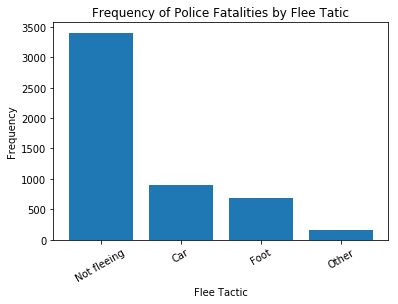

In [54]:
# This is a bar graph for fleeing tactic
flee = ["Not fleeing", "Car", "Foot", "Other"]
flee_num = [3403, 899, 688, 162]

plt.bar(flee, flee_num)
plt.xlabel("Flee Tactic")
plt.ylabel('Frequency')
plt.title('Frequency of Police Fatalities by Flee Tatic')
plt.xticks(rotation=30)

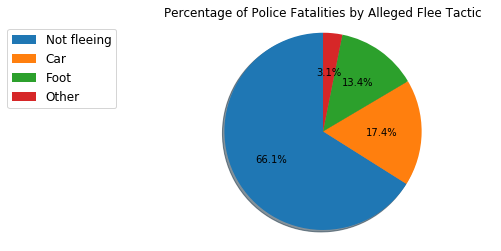

In [18]:
# This is a pie chart for the flee column

labels = ["Not fleeing", "Car", "Foot", "Other"]
sizes = [3403/(3403+899+688+162), 899/(3403+899+688+162), 688/(3403+899+688+162), 162/(3403+899+688+162)]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.legend(labels, loc='best', bbox_to_anchor=(-0.1, 1.),
           fontsize=12)
plt.title('Percentage of Police Fatalities by Alleged Flee Tactic')
plt.show()

In [55]:
WP_bodycam = WP['body_camera'].value_counts()
WP_bodycam

False    4786
True      613
Name: body_camera, dtype: int64

([0, 1], <a list of 2 Text xticklabel objects>)

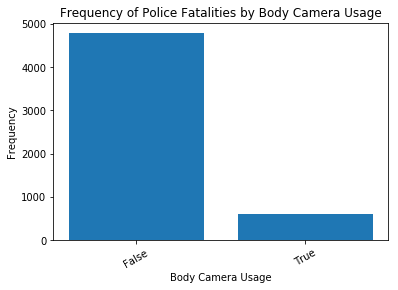

In [56]:
# This is a bar graph for body camera usage
bodycam = ["False", "True"]
bodycam_num = [4786, 613]

plt.bar(bodycam, bodycam_num)
plt.xlabel("Body Camera Usage")
plt.ylabel('Frequency')
plt.title('Frequency of Police Fatalities by Body Camera Usage')
plt.xticks(rotation=30)

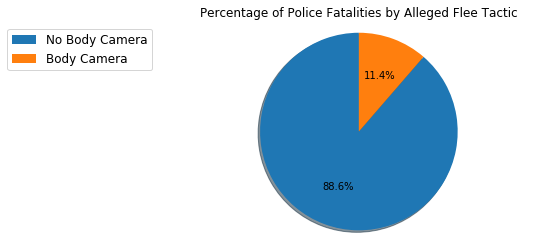

In [19]:
# This is a pie chart for the body_cam column

labels = ["No Body Camera", "Body Camera"]
sizes = [4786/(4786+613), 613/(4786+613)]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.legend(labels, loc='best', bbox_to_anchor=(-0.1, 1.),
           fontsize=12)
plt.title('Percentage of Police Fatalities by Alleged Flee Tactic')
plt.show()

## Summary of Insights into the Washington Post Data
Note: The following only include data which did not include null values. All given percentages are approximations.

Age: This dataset is the only one that has age as an integer type. There are 5159 entries that list age. The mean age in the data set is 37.1. The minimum age is 6. The maximum age is 91. The median age is 35. The ages have a standard deviation of 13.1. According to the data, the percentages of deaths in each age range are as follows: 0-12 at 0.1% (3 cases), 13-19 at 5.3% (274 cases), 20-29 at 27.5% (1417 cases), 30-39 at 30.1% (1551 cases), 40-49 at 18.6% (959 cases), 50-59 at 12.3% (633 cases), 60-69 at 4.7% (242 cases), 70-79 at 1.2% (63 cases), 80-89 at 0.3% (16 cases), 90-99 at 0.01% (1 case).

Manner of Death: Every person in the data set seems to have been shot to death, save a small portion (270) who were shot and tasered.

Armed: 62% of observations reported an alleged gun, and 16% of observations reported an alleged knife. 7% of observations indicated the victims being unarmed.

Gender: 95.6% of observations in the data set indicate male sex while 4.4% of observations in the data set indicate female sex.

Race: 50.6% of the observations were white (non-hispanic), 26.4% were black (non-hispanic), 18.4% were hispanic. Around 4.6% of observations indicate fatalities of Asians, Native Americans, and other races by police. Unfortunately, Hispanic describes ethnicity and is a disputed term; the data does not indicate Latinx white, black,  indigenous, or several of the aforementioned.

State: In order, 100 or more fatalities were reported in the following states: CA (795), TX (480), FL (349), AZ (253), CO (194), GA (181), OK (164), NC (156), OH (155), WA (152), MO (139), TN (138), LA (109), PA (108), NM (105), AL (104), IL (103), NY (100).

Signs of Mental Illness: 77.5% of observations (4185) reported no signs of mental illness while 22.5% reported signs of mental illness (1214).

Alleged Threat Level: 64.5% of observations (3484) reported a threat of attack, 31.1% (1677) reported other threat, and 4.4% (238) reported that it was undetermined if there were any threats.

Alleged Fleeing: Two-thirds of victims of police fatalities did not flee. 17% allegedly fled by car. 13 allegedly fled by foot. 3 allegedly fled by some other means.

Body Camera Usage: 88.6% of observations (4786) in the data set indicate no body camera usage by police officers while 11.4% of observations (613) do.

## The Guardian Data Analysis and Visualization
This data has been cleaned and formatted by UMass and is available at https://github.com/slanglab/policefatalities_emnlp2017/blob/master/data/gold/guardian/guard-raw.csv

In [33]:
guardian = pd.read_csv("Data/guard-raw.csv")

In [70]:
guardian.head() # first five observations

,uid,name,age,gender,raceethnicity,month,day,year,streetaddress,city,state,classification,lawenforcementagency,armed
0,20161,Joshua Sisson,30,Male,White,January,1,2016,4200 6th Ave,San Diego,CA,Gunshot,San Diego Police Department,Knife
1,20162,Germonta Wallace,30,Male,Black,January,3,2016,2600 Watson Dr,Charlotte,NC,Gunshot,Charlotte-Mecklenburg Police Department,Firearm
2,20163,Sean O'Brien,37,Male,White,January,2,2016,100 Washington St,Livingston,MT,Gunshot,Livingston Police Department,Knife
3,20164,Rodney Turner,22,Male,Black,January,4,2016,3600 NW 42nd St,Oklahoma City,OK,Gunshot,Oklahoma City Police Department,Firearm
4,20165,Eric Senegal,27,Male,Black,January,4,2016,Gene Stanley Rd,Ragley,LA,Gunshot,Beauregard Parish Sheriff's Office,Unknown


In [67]:
guardian.size # number of observations in the dataset

14952

In [68]:
guardian.columns # names of the columns/labels in the dataframe

Index(['uid', 'name', 'age', 'gender', 'raceethnicity', 'month', 'day', 'year',
       'streetaddress', 'city', 'state', 'classification',
       'lawenforcementagency', 'armed'],
      dtype='object')

In [69]:
guardian.dtypes # types of the labels in the dataframe

uid                      int64
name                    object
age                     object
gender                  object
raceethnicity           object
month                   object
day                      int64
year                     int64
streetaddress           object
city                    object
state                   object
classification          object
lawenforcementagency    object
armed                   object
dtype: object

In [34]:
# code to count frequency of age ranges
one_to_twelve = 0
thirteen_to_nineteen = 0
twenties = 0
thirties = 0
forties = 0
fifties = 0
sixties = 0
seventies = 0
eighties = 0
nineties = 0

guard_age_list = []

for item in guardian["age"]:
    if item.isdigit() == True:
        # convert to integer
        item = int(item)
        guard_age_list.append(item)
        if 0 <= item <= 12:
            one_to_twelve += 1
        if 13 <= item <= 19:
            thirteen_to_nineteen +=1
        if 20 <= item <= 29:
            twenties += 1
        if 30 <= item <= 39:
            thirties += 1
        if 40 <= item <= 49:
            forties += 1
        if 50 <= item <= 59:
            fifties += 1
        if 60 <= item <= 69:
            sixties += 1
        if 70 <= item <= 79:
            seventies += 1
        if 80 <= item <= 89:
            eighties += 1
        if 90 <= item <= 99:
            nineties += 1

guard_age_dict = {"1-12": one_to_twelve, "13-19": thirteen_to_nineteen, "20-29": twenties, "30-39": thirties, \
                  "40-49": forties, "50-59": fifties, "60-69": sixties, "70-79" : seventies, "80-89": eighties, \
                  "90-99": nineties}
guard_age_dict

{'1-12': 2,
 '13-19': 57,
 '20-29': 286,
 '30-39': 347,
 '40-49': 179,
 '50-59': 128,
 '60-69': 46,
 '70-79': 8,
 '80-89': 5,
 '90-99': 0}

In [35]:
df_age_guard = pd.DataFrame(guard_age_list, columns=["Age"])
df_age_guard.describe()

,Age
count,1058.000000
mean,36.656900
std,12.858316
min,10.000000
25%,27.000000
50%,35.000000
75%,45.000000
max,86.000000


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text xticklabel objects>)

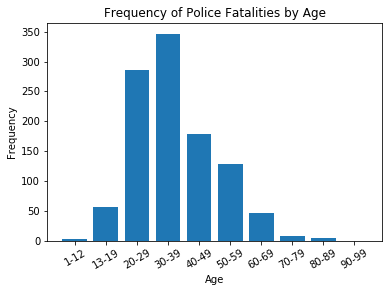

In [36]:
keys = guard_age_dict.keys()
values = guard_age_dict.values()

plt.bar(keys, values)
plt.xlabel("Age")
plt.ylabel('Frequency')
plt.title('Frequency of Police Fatalities by Age')
plt.xticks(rotation=30)

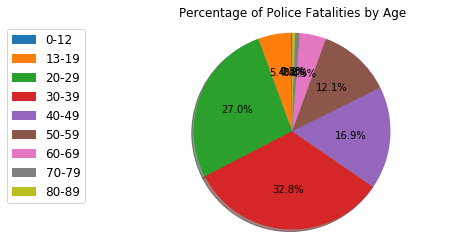

In [37]:
labels = '0-12', '13-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89'
total = 57+286+347+179+128+46+8+5
sizes = [2/total, 57/total, 286/total, 347/total, 179/total, 128/total, 46/total, 8/total, 5/total]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.legend(labels, loc='best', bbox_to_anchor=(-0.1, 1.),
           fontsize=12)
plt.title('Percentage of Police Fatalities by Age')
plt.show()

In [30]:
guard_gender = guardian["gender"].value_counts()
guard_gender

Male      1011
Female      57
Name: gender, dtype: int64

([0, 1], <a list of 2 Text xticklabel objects>)

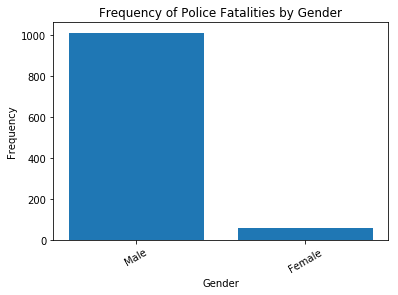

In [31]:
# This is a bar graph for police fatalities by gender
guard_gender = ["Male", "Female"]
guard_gender_num = [1011, 57]

plt.bar(guard_gender, guard_gender_num)
plt.xlabel("Gender")
plt.ylabel('Frequency')
plt.title('Frequency of Police Fatalities by Gender')
plt.xticks(rotation=30)

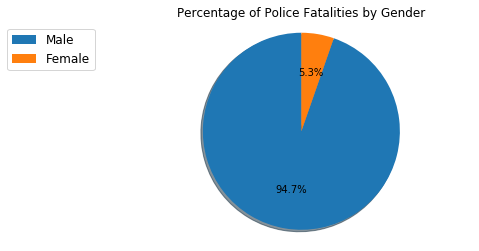

In [32]:
# This is a pie chart for police fatalities by gender
labels = ["Male", "Female"]
total = 1011+57
sizes = [1011/total, 57/total]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.legend(labels, loc='best', bbox_to_anchor=(-0.1, 1.),
           fontsize=12)
plt.title('Percentage of Police Fatalities by Gender')
plt.show()

In [73]:
guard_race = guardian['raceethnicity'].value_counts() # count frequency at which each race appears in the dataset
guard_race

White                     558
Black                     258
Hispanic/Latino           183
Unknown                    24
Native American            21
Asian/Pacific Islander     21
Arab-American               3
Name: raceethnicity, dtype: int64

([0, 1, 2, 3, 4, 5, 6], <a list of 7 Text xticklabel objects>)

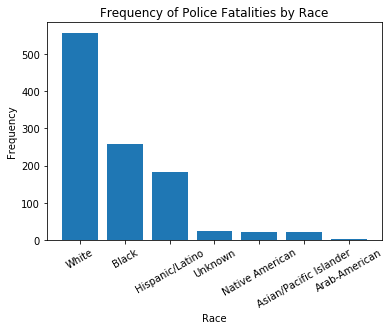

In [103]:
# This is a bar graph for police fatalities by race
guard_race = ["White", "Black", "Hispanic/Latino", "Unknown", "Native American", "Asian/Pacific Islander", "Arab-American"]
guard_race_num = [558, 258, 183, 24, 21, 21, 3]

plt.bar(guard_race, guard_race_num)
plt.xlabel("Race")
plt.ylabel('Frequency')
plt.title('Frequency of Police Fatalities by Race')
plt.xticks(rotation=30)

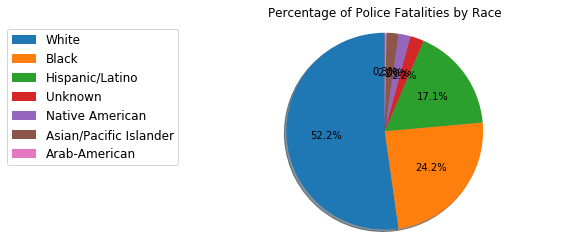

In [20]:
# This is a pie chart for police fatalities by race
labels = ["White", "Black", "Hispanic/Latino", "Unknown", "Native American", "Asian/Pacific Islander", "Arab-American"]
total = 558 + 258 + 183 + 24 + 21 + 21 + 3
sizes = [558/total, 258/total, 183/total, 24/total, 21/total, 21/total, 3/total]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.legend(labels, loc='best', bbox_to_anchor=(-0.1, 1.),
           fontsize=12)
plt.title('Percentage of Police Fatalities by Race')
plt.show()

In [91]:
guard_month = guardian['month'].value_counts() # count the frequency at which each month appears in the dataset
guard_month

February     100
March        100
June          98
August        94
November      91
January       87
May           86
July          86
October       85
April         84
September     82
December      75
Name: month, dtype: int64

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 <a list of 12 Text xticklabel objects>)

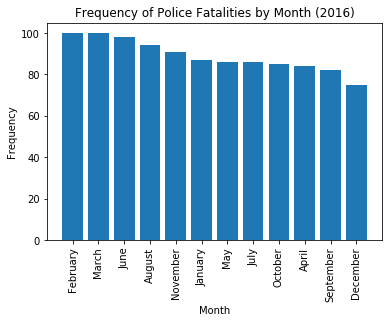

In [102]:
# This is a bar graph for police fatalities by month in 2016
guard_month = ["February", "March", "June", "August", "November", "January", "May", "July", \
               "October", "April", "September", "December"]
guard_month_num = [100, 100, 98, 94, 91, 87, 86, 86, 85, 84, 82, 75]

plt.bar(guard_month, guard_month_num)
plt.xlabel("Month")
plt.ylabel('Frequency')
plt.title('Frequency of Police Fatalities by Month (2016)')
plt.xticks(rotation=90)

In [92]:
guard_year = guardian['year'].value_counts() # count frequency of years in the dataset
guard_year

2016    1068
Name: year, dtype: int64

In [25]:
guard_state = guardian['state'].value_counts().head(10) # count the frequency of each state in the dataset
guard_state

CA    160
TX     91
FL     68
AZ     48
NC     35
CO     32
OK     31
GA     30
IL     28
OH     28
Name: state, dtype: int64

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text xticklabel objects>)

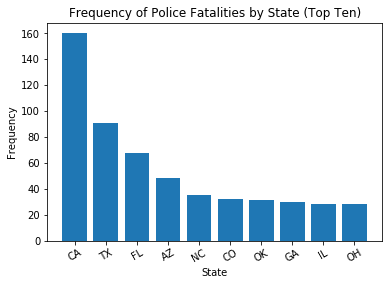

In [94]:
# This is a bar graph for police fatalities by state (top ten)
guard_state = ["CA", "TX", "FL", "AZ", "NC", "CO", "OK", "GA", "IL", "OH"]
guard_state_num = [160, 91, 68, 48, 35, 32, 31, 30, 28, 28]

plt.bar(guard_state, guard_state_num)
plt.xlabel("State")
plt.ylabel('Frequency')
plt.title('Frequency of Police Fatalities by State (Top Ten)')
plt.xticks(rotation=30)

In [95]:
guard_class = guardian['classification'].value_counts()
guard_class

Gunshot              998
Death in custody      33
Taser                 21
Struck by vehicle     15
Other                  1
Name: classification, dtype: int64

([0, 1, 2, 3, 4], <a list of 5 Text xticklabel objects>)

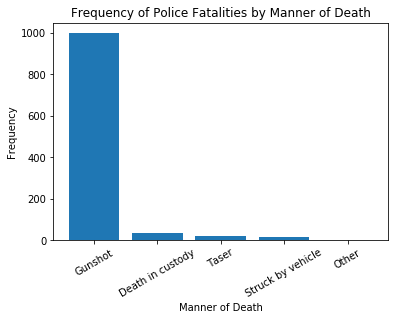

In [96]:
# This is a bar graph for how the victims were murdered
guard_class = ["Gunshot", "Death in custody", "Taser", "Struck by vehicle", "Other"]
guard_class_num = [998, 33, 21, 15, 1]

plt.bar(guard_class, guard_class_num)
plt.xlabel("Manner of Death")
plt.ylabel('Frequency')
plt.title('Frequency of Police Fatalities by Manner of Death')
plt.xticks(rotation=30)

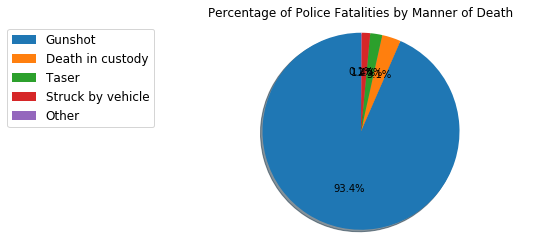

In [22]:
# This is a pie chart for percentage of police fatalities by manner of death
labels = ["Gunshot", "Death in custody", "Taser", "Struck by vehicle", "Other"]
total = 998+33+21+15+1
sizes = [998/total, 33/total, 21/total, 15/total, 1/total]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.legend(labels, loc='best', bbox_to_anchor=(-0.1, 1.),
           fontsize=12)
plt.title('Percentage of Police Fatalities by Manner of Death')
plt.show()

In [26]:
guard_agency = guardian['lawenforcementagency'].value_counts().head(15)
guard_agency

Los Angeles Police Department              19
Los Angeles County Sheriff's Department    17
Unknown                                    16
Phoenix Police Department                  15
Chicago Police Department                  11
New York Police Department                 11
San Antonio Police Department               9
Tulsa Police Department                     8
United States Marshals Service              8
Houston Police Department                   7
California Highway Patrol                   7
Austin Police Department                    6
Columbus Division of Police                 6
Kentucky State Police                       6
Hawaii Police Department                    6
Name: lawenforcementagency, dtype: int64

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10], <a list of 11 Text xticklabel objects>)

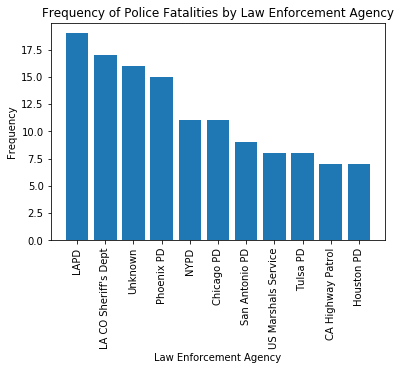

In [98]:
# This is a bar graph for top ten agencies with most reported fatalities
guardian_agency = ["LAPD", "LA CO Sheriff's Dept", "Unknown", \
                   "Phoenix PD", "NYPD", "Chicago PD", \
                   "San Antonio PD", "US Marshals Service", "Tulsa PD", \
                   "CA Highway Patrol", "Houston PD"]
guardian_agency_num = [19, 17, 16, 15, 11, 11, 9, 8, 8, 7, 7]

plt.bar(guardian_agency, guardian_agency_num)
plt.xlabel("Law Enforcement Agency")
plt.ylabel('Frequency')
plt.title('Frequency of Police Fatalities by Law Enforcement Agency')
plt.xticks(rotation=90)

In [99]:
guard_armed = guardian['armed'].value_counts()
guard_armed

Firearm               499
Knife                 155
No                    149
Unknown               106
Other                  70
Non-lethal firearm     45
Vehicle                34
Disputed               10
Name: armed, dtype: int64

([0, 1, 2, 3, 4, 5, 6, 7], <a list of 8 Text xticklabel objects>)

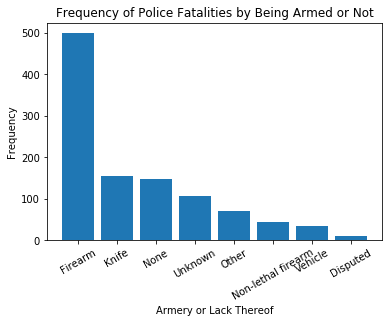

In [100]:
# This is a bar graph for whether a victim was armed or not
guard_armed = ["Firearm", "Knife", "None", "Unknown", "Other", "Non-lethal firearm", "Vehicle", "Disputed"]
guard_armed_num = [499, 155, 149, 106, 70, 45, 34, 10]

plt.bar(guard_armed, guard_armed_num)
plt.xlabel("Armery or Lack Thereof")
plt.ylabel('Frequency')
plt.title('Frequency of Police Fatalities by Being Armed or Not')
plt.xticks(rotation=30)

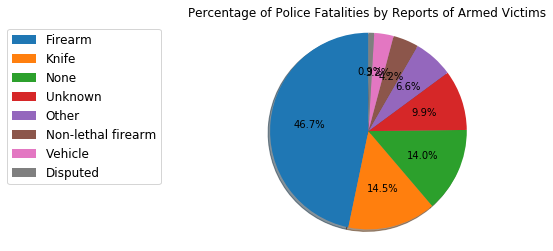

In [28]:
# This is a pie chart for the armed column
labels = ["Firearm", "Knife", "None", "Unknown", "Other", "Non-lethal firearm", "Vehicle", "Disputed"]
total = 499+155+149+106+70+45+34+10
sizes = [499/total, 155/total, 149/total, 106/total, 70/total, 45/total, 34/total, 10/total]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.legend(labels, loc='best', bbox_to_anchor=(-0.1, 1.),
           fontsize=12)
plt.title('Percentage of Police Fatalities by Reports of Armed Victims')
plt.show()

## Summary of Insights into The Guardian Data

Age: The mean age in the data set is 36.656900. The median age is 35. The minimum age is 10, and the maximum age is 86. The standard deviation in ages is 12.858316. The percentage of cases in each age range are as follows: 13-19 at 5.4% (57 cases), 20-29 at 27.1% (286 cases), 30-39 at 32.9% (347 cases), 40-49 at 17% (179 cases), 50-59 at 12.1% (128 cases), 60-69 at 4.4% (46 cases), 70-79 at 0.8% (8 cases), 80-89 at 0.5% (5 cases).

Gender: 94.7% of the observtions in the data set are reported as male (1011) and 5.3% as female (57). The data set reported nobody outside of that binary, so either trans deaths by police were not reported in the news articles collected by The Guardian, or the victims were misgendered in the news articles collected.

Race/Ethnicity: Of the victims reported, 52.2% are white (558), 24.2% are Black (258), 17.1% are Hispanic (183), 2.2% are Unknown (24), 1.9% are Native American (21), 1.9% are Asian/Pacific Islander (21), 0.2% are Arab-American (3). 

Year: All observations are from the year 2016.

State: The top ten states represented in the data set are: CA (160), TX (91), FL (68), AZ (48), NC (35), CO (32), OK (31), GA (30), IL (28), OH (28).

Classification (of death): The most common classification of death in the dataset was gunshot (998) representing 93.4% of the cases. Other causes of death included 33 cases of death in custody (3%), 21 deaths by taser (1.9%), 15 victims struck by a vehicle (1.4%), and 1 case which involved some other cause of death (0.1%).

Law Enforcement Agency: The top ten agencies with the number ten spot tied are: LAPD (19), LA CO Sheriff's Dept (17), Unknown (16), Phoenix PD (15), NYPD (11), Chicago PD (11), San Antonio PD (9), US Marshals Service (8), Tulsa PD (8), CA Highway Patrol (7), and Houston PD (7).

Armed: According to the dataset, the observations reported 46.7% of victims armed with a gun (499), 14.5% armed with a knife (155), 14% not armed at all (149), 9.9% unknown whether or not the victim was armed (106), 6.6% armed with other things (70), 4.2% armed with a non-lethal firearm (45), 3.1% armed with a vehicle (34), and 0.9% disputed as to whether or not they were armed (10).

## Fatal Encounters Data Analysis and Visualization
Link: https://docs.google.com/spreadsheets/d/1dKmaV_JiWcG8XBoRgP8b4e9Eopkpgt7FL7nyspvzAsE/edit#gid=0

In [3]:
FE = pd.read_csv("Data/fatal_encounters_dataset.csv")

In [105]:
FE.size

789908

In [106]:
FE.columns

Index(['Unique ID', 'Subject's name', 'Subject's age', 'Subject's gender',
       'Subject's race', 'Subject's race with imputations',
       'Imputation probability', 'URL of image of deceased',
       'Date of injury resulting in death (month/day/year)',
       'Location of injury (address)', 'Location of death (city)',
       'Location of death (state)', 'Location of death (zip code)',
       'Location of death (county)', 'Full Address', 'Latitude', 'Longitude',
       'Agency responsible for death', 'Cause of death',
       'A brief description of the circumstances surrounding the death',
       'Dispositions/Exclusions INTERNAL USE, NOT FOR ANALYSIS',
       'Link to news article or photo of official document',
       'Symptoms of mental illness? INTERNAL USE, NOT FOR ANALYSIS', 'Video',
       'Date&Description', 'Unique ID formula',
       'Unique identifier (redundant)', 'Date (Year)'],
      dtype='object')

In [107]:
FE.dtypes

Unique ID                                                         float64
Subject's name                                                     object
Subject's age                                                      object
Subject's gender                                                   object
Subject's race                                                     object
Subject's race with imputations                                    object
Imputation probability                                             object
URL of image of deceased                                           object
Date of injury resulting in death (month/day/year)                 object
Location of injury (address)                                       object
Location of death (city)                                           object
Location of death (state)                                          object
Location of death (zip code)                                      float64
Location of death (county)            

In [161]:
FE.head()

,Unique ID,Subject's name,Subject's age,Subject's gender,Subject's race,Subject's race with imputations,Imputation probability,URL of image of deceased,Date of injury resulting in death (month/day/year),Location of injury (address),...,Cause of death,A brief description of the circumstances surrounding the death,"Dispositions/Exclusions INTERNAL USE, NOT FOR ANALYSIS",Link to news article or photo of official document,"Symptoms of mental illness? INTERNAL USE, NOT FOR ANALYSIS",Video,Date&Description,Unique ID formula,Unique identifier (redundant),Date (Year)
0,25747.0,Mark A. Horton,21,Male,African-American/Black,African-American/Black,not imputed,NaN,01/01/2000,Davison Freeway,...,Vehicle,Two Detroit men killed when their car crashed ...,Unreported,https://drive.google.com/file/d/1-nK-RohgiM-tZ...,No,NaN,1/1/2000: Two Detroit men killed when their ca...,NaN,25747.0,2000
1,25748.0,Phillip A. Blurbridge,19,Male,African-American/Black,African-American/Black,not imputed,NaN,01/01/2000,Davison Freeway,...,Vehicle,Two Detroit men killed when their car crashed ...,Unreported,https://drive.google.com/file/d/1-nK-RohgiM-tZ...,No,NaN,1/1/2000: Two Detroit men killed when their ca...,NaN,25748.0,2000
2,25746.0,Samuel H. Knapp,17,Male,European-American/White,European-American/White,not imputed,NaN,01/01/2000,27898-27804 US-101,...,Vehicle,Samuel Knapp was allegedly driving a stolen ve...,Unreported,https://drive.google.com/file/d/10DisrV8K5ReP1...,No,NaN,1/1/2000: Samuel Knapp was allegedly driving a...,NaN,25746.0,2000
3,25749.0,Mark Ortiz,23,Male,Hispanic/Latino,Hispanic/Latino,not imputed,NaN,01/01/2000,600 W Cherry Ln,...,Vehicle,A motorcycle was allegedly being driven errati...,Unreported,https://drive.google.com/file/d/1qAEefRjX_aTtC...,No,NaN,1/1/2000: A motorcycle was allegedly being dri...,NaN,25749.0,2000
4,1.0,LaTanya Janelle McCoy,24,Female,African-American/Black,African-American/Black,not imputed,NaN,01/02/2000,5700 block Mack Road,...,Vehicle,LaTanya Janelle McCoy's car was struck from be...,Unknown,http://www.recordnet.com/article/20000110/A_NE...,No,NaN,1/2/2000: LaTanya Janelle McCoy's car was stru...,NaN,1.0,2000


In [109]:
FE_age = FE["Subject's age"].value_counts()
FE_age

22    908
25    884
24    856
23    840
27    839
Name: Subject's age, dtype: int64

In [110]:
FE_sex = FE["Subject's gender"].value_counts()
FE_sex

Male           25432
Female          2664
Transgender       15
White              1
Transexual         1
Name: Subject's gender, dtype: int64

Text(0.5,1,'Frequency of Police Fatalities by Gender')

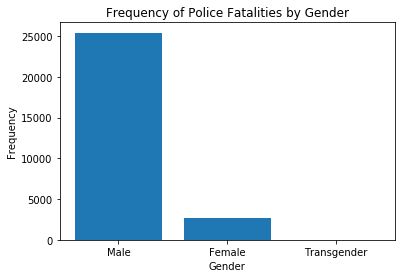

In [121]:
# This is a bar graph for victims' sex
FE_sex = ["Male", "Female", "Transgender"]
FE_sex_num = [25432, 2665, 16]

plt.bar(FE_sex, FE_sex_num)
plt.xlabel("Gender")
plt.ylabel('Frequency')
plt.title('Frequency of Police Fatalities by Gender')
#plt.xticks(rotation=30)

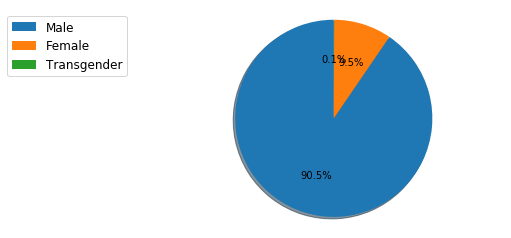

In [129]:
labels = "Male", "Female", "Transgender"
sizes = [0.9046, 0.0947, 0.0005]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.legend(labels, loc='best', bbox_to_anchor=(-0.1, 1.),
           fontsize=12)
plt.show()

In [111]:
FE[FE["Subject's gender"] == "White"] # This has been reported to Fatal Encounters. For now, Brooke will be considered female.

,Unique ID,Subject's name,Subject's age,Subject's gender,Subject's race,Subject's race with imputations,Imputation probability,URL of image of deceased,Date of injury resulting in death (month/day/year),Location of injury (address),...,Cause of death,A brief description of the circumstances surrounding the death,"Dispositions/Exclusions INTERNAL USE, NOT FOR ANALYSIS",Link to news article or photo of official document,"Symptoms of mental illness? INTERNAL USE, NOT FOR ANALYSIS",Video,Date&Description,Unique ID formula,Unique identifier (redundant),Date (Year)
24780,24824.0,Brooke Lyn Maynard,24,White,European-American/White,European-American/White,not imputed,NaN,08/02/2018,W Club Blvd & N Duke St,...,Vehicle,Police tried to stop a Honda Accord that was s...,Criminal,http://spectrumlocalnews.com/nc/triangle-sandh...,No,NaN,8/2/2018: Police tried to stop a Honda Accord ...,NaN,24824.0,2018


In [112]:
FE_race = FE["Subject's race"].value_counts()
FE_race

European-American/White    9099
Race unspecified           8750
African-American/Black     5988
Hispanic/Latino            3620
Asian/Pacific Islander      424
Native American/Alaskan     280
Middle Eastern               48
HIspanic/Latino               1
Name: Subject's race, dtype: int64

([0, 1, 2, 3, 4, 5, 6], <a list of 7 Text xticklabel objects>)

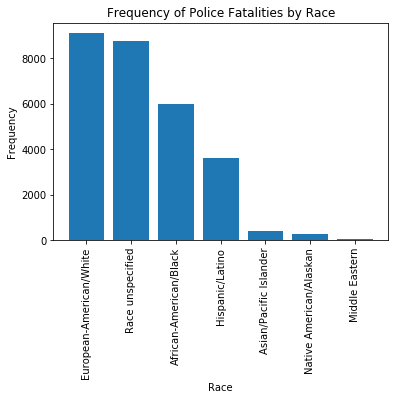

In [135]:
# This is a bar graph for victims' by race
FE_race = ["European-American/White", "Race unspecified", "African-American/Black", "Hispanic/Latino", \
           "Asian/Pacific Islander", "Native American/Alaskan", "Middle Eastern"]
FE_race_num = [9099, 8750, 5988, 3621, 424, 280, 48]

plt.bar(FE_race, FE_race_num)
plt.xlabel("Race")
plt.ylabel('Frequency')
plt.title('Frequency of Police Fatalities by Race')
plt.xticks(rotation=90)

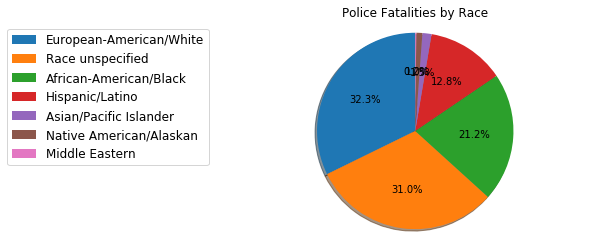

In [140]:
labels = "European-American/White", "Race unspecified", "African-American/Black", "Hispanic/Latino", \
           "Asian/Pacific Islander", "Native American/Alaskan", "Middle Eastern"
sizes = [0.322545197, 0.310173697, 0.212265154, 0.128358738, 0.015030131, 0.009925558, 0.001701524]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.legend(labels, loc='best', bbox_to_anchor=(-0.1, 1.),
           fontsize=12)
plt.title("Police Fatalities by Race")
plt.show()

In [113]:
FE_race_imp = FE["Subject's race with imputations"].value_counts()
FE_race_imp

European-American/White    13363
African-American/Black      7637
Hispanic/Latino             4563
Race unspecified            1376
Asian/Pacific Islander       521
Native American/Alaskan      275
Middle Eastern                48
Other Race                     9
European American/White        5
HIspanic/Latino                1
Name: Subject's race with imputations, dtype: int64

([0, 1, 2, 3, 4, 5, 6, 7], <a list of 8 Text xticklabel objects>)

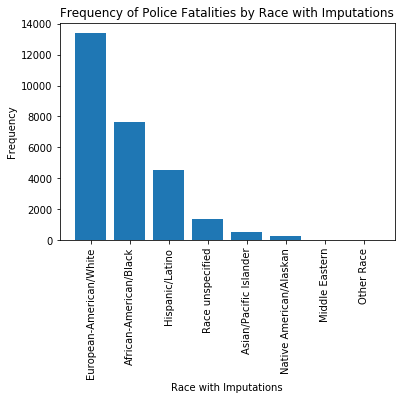

In [160]:
# This is a bar graph for victims' by race with imputations
FE_race_imp = ["European-American/White", "African-American/Black", "Hispanic/Latino", "Race unspecified", \
           "Asian/Pacific Islander", "Native American/Alaskan", "Middle Eastern", "Other Race"]
FE_race_imp_num = [13368, 7637, 4564, 1376, 521, 275, 48, 9]

plt.bar(FE_race_imp, FE_race_imp_num)
plt.xlabel("Race with Imputations")
plt.ylabel('Frequency')
plt.title('Frequency of Police Fatalities by Race with Imputations')
plt.xticks(rotation=90)

In [151]:
FE_city = FE["Location of death (city)"].value_counts().head(20)
FE_city 

Chicago          447
Houston          440
Los Angeles      406
Phoenix          247
San Antonio      230
Philadelphia     230
Kansas City      223
St. Louis        208
Las Vegas        196
Dallas           188
Detroit          173
Columbus         165
Oklahoma City    156
Albuquerque      151
Jacksonville     150
Baltimore        147
Atlanta          145
Miami            140
Fresno           134
Tucson           133
Name: Location of death (city), dtype: int64

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 <a list of 20 Text xticklabel objects>)

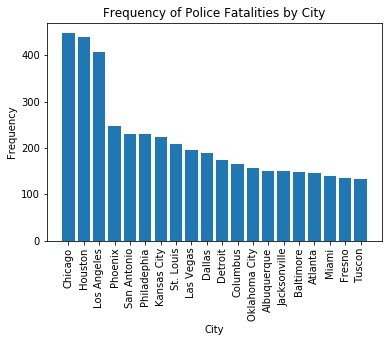

In [153]:
FE_city = ["Chicago", "Houston", "Los Angeles", "Phoenix", "San Antonio", "Philadephia", "Kansas City", "St. Louis", \
           "Las Vegas", "Dallas", "Detroit", "Columbus", "Oklahoma City", "Albuquerque", "Jacksonville", "Baltimore", \
           "Atlanta", "Miami", "Fresno", "Tuscon"]
FE_city_num = [447, 440, 406, 247, 230, 230, 223, 208, 196, 188, 173, 165, 156, 151, 150, 147, 145, 140, 134, 133]

plt.bar(FE_city, FE_city_num)
plt.xlabel("City")
plt.ylabel('Frequency')
plt.title('Frequency of Police Fatalities by City')
plt.xticks(rotation=90)

In [150]:
FE_state = FE["Location of death (state)"].value_counts().head(20)
FE_state

CA    4532
TX    2485
FL    1699
GA    1059
IL    1033
OH     926
PA     915
MO     870
MI     833
AZ     820
OK     653
NY     642
AL     627
CO     616
WA     610
TN     605
LA     590
NC     586
VA     584
SC     535
Name: Location of death (state), dtype: int64

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 <a list of 20 Text xticklabel objects>)

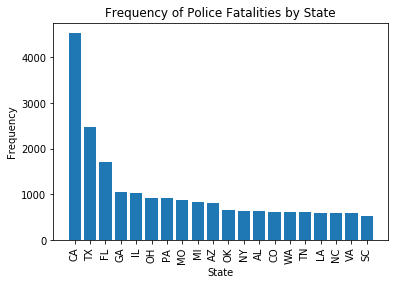

In [154]:
FE_state = ["CA", "TX", "FL", "GA", "IL", "OH", "PA", "MO", "MI", "AZ", "OK", "NY", "AL", "CO", "WA", "TN", "LA", "NC", "VA", "SC"]
FE_state_num = [4532, 2485, 1699, 1059, 1033, 926, 915, 870, 833, 820, 653, 642, 627, 616, 610, 605, 590, 586, 584, 535]

plt.bar(FE_state, FE_state_num)
plt.xlabel("State")
plt.ylabel('Frequency')
plt.title('Frequency of Police Fatalities by State')
plt.xticks(rotation=90)

In [155]:
FE_zip = FE["Location of death (zip code)"].value_counts().head(10)
FE_zip

60620.0    32
60616.0    32
60628.0    32
93307.0    27
33311.0    25
60624.0    24
60637.0    24
90221.0    24
60623.0    22
90003.0    22
Name: Location of death (zip code), dtype: int64

In [144]:
FE_county = FE["Location of death (county)"].value_counts().head(20)
FE_county

Los Angeles       1213
Cook               598
Harris             550
Maricopa           469
Orange             431
Jefferson          380
San Diego          338
San Bernardino     328
Clark              318
Jackson            292
Wayne              287
Dallas             283
Riverside          279
Montgomery         247
Bexar              243
Philadelphia       231
Franklin           228
Alameda            228
Miami-Dade         227
Marion             196
Name: Location of death (county), dtype: int64

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 <a list of 20 Text xticklabel objects>)

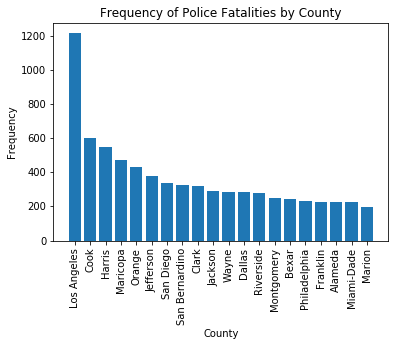

In [158]:
FE_county = ["Los Angeles", "Cook", "Harris", "Maricopa", "Orange", "Jefferson", "San Diego", "San Bernardino", \
             "Clark", "Jackson", "Wayne", "Dallas", "Riverside", "Montgomery", "Bexar", "Philadelphia", "Franklin", \
             "Alameda", "Miami-Dade", "Marion"]
FE_county_num = [1213, 598, 550, 469, 431, 380, 338, 328, 318, 292, 287, 283, 279, 247, 243, 231, 228, 228, 227, 196]

plt.bar(FE_county, FE_county_num)
plt.xlabel("County")
plt.ylabel('Frequency')
plt.title('Frequency of Police Fatalities by County')
plt.xticks(rotation=90)

In [145]:
FE_agency = FE["Agency responsible for death"].value_counts().head(20)
FE_agency

Los Angeles Police Department               468
Chicago Police Department                   423
Los Angeles County Sheriff's Department     344
City of New York Police Department          326
Houston Police Department                   310
California Highway Patrol                   265
Phoenix Police Department                   229
Philadelphia Police Department              207
Pennsylvania State Police                   190
San Antonio Police Department               189
Las Vegas Metropolitan Police Department    186
Kansas City Police Department               168
Dallas Police Department                    155
St. Louis Metropolitan Police Department    148
Oklahoma City Police Department             139
Miami-Dade Police Department                136
Baltimore Police Department                 128
Jacksonville Sheriff's Office               124
Detroit Police Department                   121
San Bernardino County Sheriff's Office      119
Name: Agency responsible for death, dtyp

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 <a list of 20 Text xticklabel objects>)

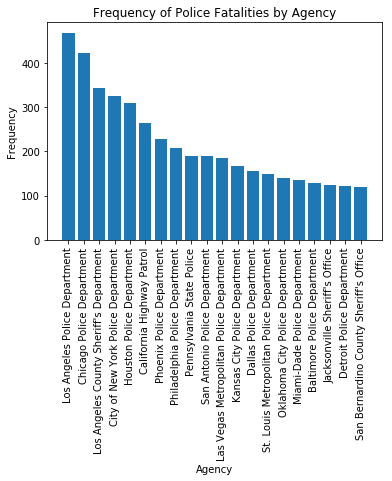

In [159]:
FE_agency = ["Los Angeles Police Department", "Chicago Police Department", "Los Angeles County Sheriff's Department", \
             "City of New York Police Department", "Houston Police Department", "California Highway Patrol", \
             "Phoenix Police Department", "Philadelphia Police Department", "Pennsylvania State Police", \
             "San Antonio Police Department", "Las Vegas Metropolitan Police Department", "Kansas City Police Department", \
             "Dallas Police Department", "St. Louis Metropolitan Police Department", "Oklahoma City Police Department", \
             "Miami-Dade Police Department", "Baltimore Police Department", "Jacksonville Sheriff's Office", \
             "Detroit Police Department", "San Bernardino County Sheriff's Office"]
FE_agency_num = [468, 423, 344, 326, 310, 265, 229, 207, 190, 189, 186, 168, 155, 148, 139, 136, 128, 124, 121, 119]

plt.bar(FE_agency, FE_agency_num)
plt.xlabel("Agency")
plt.ylabel('Frequency')
plt.title('Frequency of Police Fatalities by Agency')
plt.xticks(rotation=90)

In [119]:
FE_cause = FE["Cause of death"].value_counts()
FE_cause

Gunshot                              20030
Vehicle                               5765
Tasered                                906
Medical emergency                      378
Asphyxiated/Restrained                 267
Beaten/Bludgeoned with instrument      174
Drug overdose                          173
Drowned                                170
Undetermined                            99
Fell from a height                      73
Other                                   57
Stabbed                                 48
Burned/Smoke inhalation                 35
Chemical agent/Pepper spray             34
Unknown                                  1
Name: Cause of death, dtype: int64

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 <a list of 15 Text xticklabel objects>)

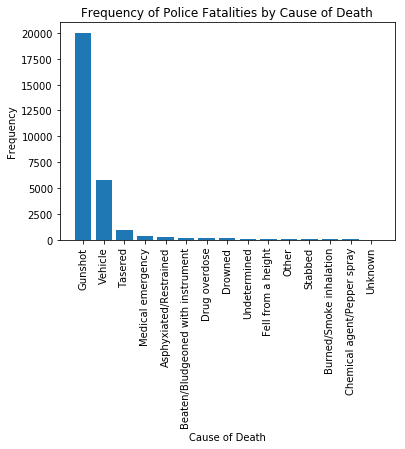

In [149]:
FE_cause = ["Gunshot", "Vehicle", "Tasered", "Medical emergency", "Asphyxiated/Restrained", "Beaten/Bludgeoned with instrument", \
           "Drug overdose", "Drowned", "Undetermined", "Fell from a height", "Other", "Stabbed", "Burned/Smoke inhalation", \
           "Chemical agent/Pepper spray", "Unknown"]
FE_cause_num = [20030, 5765, 906, 378, 267, 174, 173, 170, 99, 73, 57, 48, 35, 34, 1]

plt.bar(FE_cause, FE_cause_num)
plt.xlabel("Cause of Death")
plt.ylabel('Frequency')
plt.title('Frequency of Police Fatalities by Cause of Death')
plt.xticks(rotation=90)

In [41]:
20030+5765+906+378+267+174+173+170+99+73+57+48+35+34+1

28210

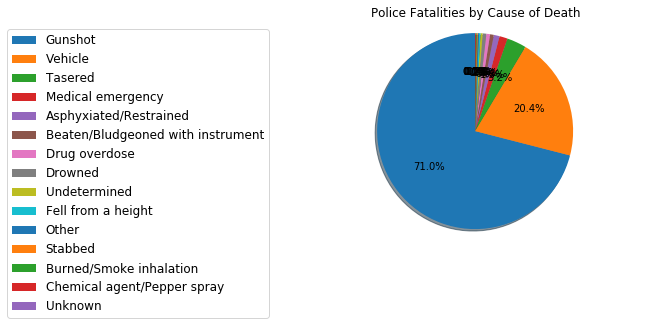

In [40]:
labels = ["Gunshot", "Vehicle", "Tasered", "Medical emergency", "Asphyxiated/Restrained", "Beaten/Bludgeoned with instrument", \
           "Drug overdose", "Drowned", "Undetermined", "Fell from a height", "Other", "Stabbed", "Burned/Smoke inhalation", \
           "Chemical agent/Pepper spray", "Unknown"]
total = 20030+5765+906+378+267+174+173+170+99+73+57+48+35+34+1
sizes = [20030, 5765, 906, 378, 267, 174, 173, 170, 99, 73, 57, 48, 35, 34, 1]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.legend(labels, loc='best', bbox_to_anchor=(-0.1, 1.),
           fontsize=12)
plt.title("Police Fatalities by Cause of Death")
plt.show()

In [162]:
FE["Date (Year)"].value_counts()

2018       1846
2019       1795
2013       1782
2017       1767
2014       1716
2015       1607
2016       1595
2012       1486
2011       1408
2010       1291
2006       1269
2009       1257
2007       1256
2008       1209
2005       1171
2003       1052
2004       1037
2002        986
2001        923
2020        898
2000        851
#REF!         7
#VALUE!       1
2100          1
Name: Date (Year), dtype: int64

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
 <a list of 21 Text xticklabel objects>)

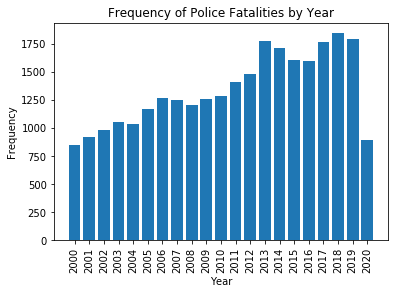

In [163]:
FE_year_ordered = ["2000", "2001", "2002", "2003", "2004", "2005", "2006", "2007", "2008", "2009", "2010", "2011", "2012", \
                   "2013", "2014", "2015", "2016", "2017", "2018", "2019", "2020"]
FE_year_ordered_num = [851, 923, 986, 1052, 1037, 1171, 1269, 1256, 1209, 1257, 1291, 1408, 1486, 1782, 1716, 1607, 1595, 1767, \
                       1846, 1795, 898]

plt.bar(FE_year_ordered, FE_year_ordered_num)
plt.xlabel("Year")
plt.ylabel('Frequency')
plt.title('Frequency of Police Fatalities by Year')
plt.xticks(rotation=90)

In [30]:
FE["Subject's age"].value_counts().head(20)

22    908
25    884
24    856
23    840
27    839
26    837
21    837
29    810
28    791
33    788
31    787
30    779
32    745
34    744
20    710
35    699
36    680
19    669
38    652
37    643
Name: Subject's age, dtype: int64

In [9]:
FE_age_dict={k:0 for k in FE["Subject's age"]}
for k in FE["Subject's age"]:
    FE_age_dict[k] +=1

In [10]:
FE_age_dict

{'21': 837,
 '19': 669,
 '17': 411,
 '23': 840,
 '24': 856,
 '53': 265,
 '30': 779,
 '29': 810,
 '55': 256,
 '42': 565,
 '41': 536,
 '45': 499,
 '20': 710,
 '25': 884,
 '22': 908,
 '28': 791,
 '31': 787,
 '36': 680,
 '35': 699,
 nan: 987,
 '26': 837,
 '68': 76,
 '16': 294,
 '49': 404,
 '27': 839,
 '50': 390,
 '44': 473,
 '43': 524,
 '38': 652,
 '32': 745,
 '34': 744,
 '14': 95,
 '15': 212,
 '18': 626,
 '33': 788,
 '1': 26,
 '57': 224,
 '88': 8,
 '37': 643,
 '40': 624,
 '85': 6,
 '48': 398,
 '56': 247,
 '52': 316,
 '46': 425,
 '63': 99,
 '74': 43,
 '60': 146,
 '59': 185,
 '51': 350,
 '69': 58,
 '10': 22,
 '13': 50,
 '39': 596,
 '47': 452,
 '66': 88,
 '79': 16,
 '12': 31,
 '11': 20,
 '54': 282,
 '65': 91,
 '75': 34,
 '20s': 17,
 '6': 21,
 '7': 21,
 '5': 20,
 '3': 19,
 '72': 43,
 '58': 218,
 '71': 46,
 '80': 15,
 '78': 32,
 '61': 143,
 '73': 35,
 '67': 64,
 '70': 47,
 '77': 28,
 '76': 37,
 '8': 13,
 '9': 20,
 '64': 86,
 '62': 144,
 '4': 18,
 '83': 16,
 '2': 21,
 '89': 5,
 '60s': 7,
 '18-2

In [27]:
for age in FE_age_dict:
    if isinstance(age, str) != True:
        FE_age_dict.pop(age)
        break
FE_age_dict

{'21': 837,
 '19': 669,
 '17': 411,
 '23': 840,
 '24': 856,
 '53': 265,
 '30': 779,
 '29': 810,
 '55': 256,
 '42': 565,
 '41': 536,
 '45': 499,
 '20': 710,
 '25': 884,
 '22': 908,
 '28': 791,
 '31': 787,
 '36': 680,
 '35': 699,
 '26': 837,
 '68': 76,
 '16': 294,
 '49': 404,
 '27': 839,
 '50': 390,
 '44': 473,
 '43': 524,
 '38': 652,
 '32': 745,
 '34': 744,
 '14': 95,
 '15': 212,
 '18': 626,
 '33': 788,
 '1': 26,
 '57': 224,
 '88': 8,
 '37': 643,
 '40': 624,
 '85': 6,
 '48': 398,
 '56': 247,
 '52': 316,
 '46': 425,
 '63': 99,
 '74': 43,
 '60': 146,
 '59': 185,
 '51': 350,
 '69': 58,
 '10': 22,
 '13': 50,
 '39': 596,
 '47': 452,
 '66': 88,
 '79': 16,
 '12': 31,
 '11': 20,
 '54': 282,
 '65': 91,
 '75': 34,
 '20s': 17,
 '6': 21,
 '7': 21,
 '5': 20,
 '3': 19,
 '72': 43,
 '58': 218,
 '71': 46,
 '80': 15,
 '78': 32,
 '61': 143,
 '73': 35,
 '67': 64,
 '70': 47,
 '77': 28,
 '76': 37,
 '8': 13,
 '9': 20,
 '64': 86,
 '62': 144,
 '4': 18,
 '83': 16,
 '2': 21,
 '89': 5,
 '60s': 7,
 '18-25': 2,
 '18

In [28]:
FE_age_list = []

for age in FE_age_dict:
    if age.isdigit() == True:
        for num in range(FE_age_dict[age]):
            FE_age_list.append(int(age))
            
FE_age_list

[21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,


In [29]:
df_age_FE = pd.DataFrame(FE_age_list, columns=["Age"])
df_age_FE.describe()

,Age
count,27158.000000
mean,35.160137
std,13.769937
min,1.000000
25%,25.000000
50%,33.000000
75%,44.000000
max,107.000000


In [40]:
# code to count frequency of age ranges
one_to_twelve = 0
thirteen_to_nineteen = 0
twenties = 0
thirties = 0
forties = 0
fifties = 0
sixties = 0
seventies = 0
eighties = 0
nineties = 0
hundreds = 0

for item in FE_age_list:
    if 0 <= item <= 12:
        one_to_twelve += 1
    if 13 <= item <= 19:
        thirteen_to_nineteen +=1
    if 20 <= item <= 29:
        twenties += 1
    if 30 <= item <= 39:
        thirties += 1
    if 40 <= item <= 49:
        forties += 1
    if 50 <= item <= 59:
        fifties += 1
    if 60 <= item <= 69:
        sixties += 1
    if 70 <= item <= 79:
        seventies += 1
    if 80 <= item <= 89:
        eighties += 1
    if 90 <= item <= 99:
        nineties += 1
    if item >= 100:
        hundreds += 1

FE_age_dict_cleaned = {"1-12": one_to_twelve, "13-19": thirteen_to_nineteen, "20-29": twenties, "30-39": thirties, \
                  "40-49": forties, "50-59": fifties, "60-69": sixties, "70-79" : seventies, "80-89": eighties, \
                  "90-99": nineties, "100-120": hundreds}
FE_age_dict_cleaned

{'1-12': 252,
 '13-19': 2357,
 '20-29': 8312,
 '30-39': 7113,
 '40-49': 4900,
 '50-59': 2733,
 '60-69': 995,
 '70-79': 361,
 '80-89': 118,
 '90-99': 15,
 '100-120': 2}

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10], <a list of 11 Text xticklabel objects>)

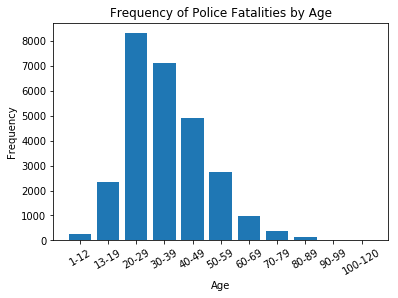

In [42]:
keys = FE_age_dict_cleaned.keys()
values = FE_age_dict_cleaned.values()
plt.bar(keys, values)
plt.xlabel("Age")
plt.ylabel('Frequency')
plt.title('Frequency of Police Fatalities by Age')
plt.xticks(rotation=30)

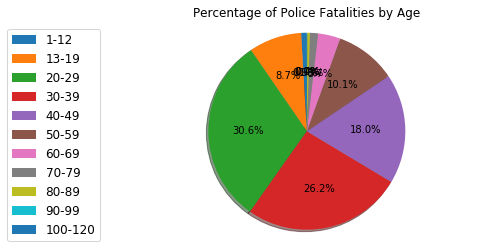

In [41]:
labels = '1-12', '13-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89', '90-99', '100-120'
total = 252+2357+8312+7113+4900+2733+995+361+118+15+2
sizes = [252/total, 2357/total, 8312/total, 7113/total, 4900/total, 2733/total, 995/total, 361/total, \
         118/total, 15/total, 2/total]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.legend(labels, loc='best', bbox_to_anchor=(-0.1, 1.),
           fontsize=12)
plt.title('Percentage of Police Fatalities by Age')
plt.show()

## Summary of Insights into the Fatal Encounters Data

Age: There were 27158 observations with numeric ages. The mean of these observations is 35.160137. The standard deviation is 13.769937. The minimum age is 1. The median is 33. The maximum age is 107. The percentage of police fatalities by age are as follows: 30.6% in the 20-29 age range (8312 cases), 26.2% in the 30-39 age range (7113 cases), 18% in the 40-49 age range (4900 cases), 10.1% in the 50-59 age range (2733 cases), 8.7% in the 13-19 age range (2357 cases), 3.7% in the 60-69 age range (995 cases), 1.3% in the 70-79 age range (361 cases), 0.9% in the age 1-12 range (52 cases), 0.4% in the 80-89 age range (118 cases), 0.1% in the 90-99 age range (15 cases), and 0.01% in the 100-120 age range (2 cases).

Gender: According to the data, 90.5% of observations are male (25432), 9.5% are female (2665), 0.1% are transgender (16).

Race: 32.2% are European-American/White (9099), 31.1% have unspecified race (8750), 21.2% are African-American/Black (5988), 12.8% Hispanic/Latino (3621), 1.5% are Asian/Pacific Islander (424), 0.9% are Native American/Alaskan (280), 0.1% are Middle Eastern (48).

State: The top twenty states represented in the data are: CA (4532), TX (2485), FL (1699), GA (1059), IL (1033), OH (926), PA (915), MO (870), MI (833), AZ (820), OK (653), NY (642), AL (627), CO (616), WA (610), TN (605), LA (590), NC (586), VA (584), SC (535).

County: The top twenty counties represented in the data are: Los Angeles (1213), Cook (598), Harris (550), Maricopa (469), Orange (431), Jefferson (380), San Diego (338), San Bernardino (328), Clark (318), Jackson (292), Wayne (287), Dallas (283), Riverside (279), Montgomery (247), Bexar (243), Philadelphia (231), Franklin (228), Alameda (228), Miami-Dade (227), Marion (196).

Agencies responsible for death: The top twenty police agencies represented in the data are: Los Angeles Police Department (468), Chicago Police Department (423), Los Angeles County Sheriff's Department (344), City of New York Police Department (326), Houston Police Department (310), California Highway Patrol (265), Phoenix Police Department (229), Philadelphia Police Department (207), Pennsylvania State Police (190), San Antonio Police Department (189), Las Vegas Metropolitan Police Department (186), Kansas City Police Department (168), Dallas Police Department (155), St. Louis Metropolitan Police Department (148), Oklahoma City Police Department (139), Miami-Dade Police Department (136), Baltimore Police Department (128), Jacksonville Sheriff's Office (124), Detroit Police Department (121), San Bernardino County Sheriff's Office (119).

Cause of death: The percentages for cause of death are as follows: 71% Gunshot (20030), 20.4% Vehicle (5765), 3.2% Tasered (906), 1.3% Medical emergency (378), 0.9% Asphyxiated/Restrained (267), 0.6% Beaten/Bludgeoned with instrument (174), 0.6% Drug overdose (173), 0.6% Drowned (170), 0.35% Undetermined (99), 0.25% Fell from a height (73), 0.2% Other (57), 0.17% Stabbed (48), 0.12% Burned/Smoke inhalation (35), 0.12% Chemical agent/Pepper spray (34), 0.003% Unknown (1).



## Summary of Insights into the Washington Post Data
Note: The following only include data which did not include null values. All given percentages are approximations.

Age: This dataset is the only one that has age as an integer type. There are 5159 entries that list age. The mean age in the data set is 37.1. The minimum age is 6. The maximum age is 91. The median age is 35. The ages have a standard deviation of 13.1. According to the data, the percentages of deaths in each age range are as follows: 0-12 at 0.1% (3 cases), 13-19 at 5.3% (274 cases), 20-29 at 27.5% (1417 cases), 30-39 at 30.1% (1551 cases), 40-49 at 18.6% (959 cases), 50-59 at 12.3% (633 cases), 60-69 at 4.7% (242 cases), 70-79 at 1.2% (63 cases), 80-89 at 0.3% (16 cases), 90-99 at 0.01% (1 case).

Manner of Death: Every person in the data set seems to have been shot to death, save a small portion (270) who were shot and tasered.

Armed: 62% of observations reported an alleged gun, and 16% of observations reported an alleged knife. 7% of observations indicated the victims being unarmed.

Gender: 95.6% of observations in the data set indicate male sex while 4.4% of observations in the data set indicate female sex.

Race: 50.6% of the observations were white (non-hispanic), 26.4% were black (non-hispanic), 18.4% were hispanic. Around 4.6% of observations indicate fatalities of Asians, Native Americans, and other races by police. Unfortunately, Hispanic describes ethnicity and is a disputed term; the data does not indicate Latinx white, black,  indigenous, or several of the aforementioned.

State: In order, 100 or more fatalities were reported in the following states: CA (795), TX (480), FL (349), AZ (253), CO (194), GA (181), OK (164), NC (156), OH (155), WA (152), MO (139), TN (138), LA (109), PA (108), NM (105), AL (104), IL (103), NY (100).

Signs of Mental Illness: 77.5% of observations (4185) reported no signs of mental illness while 22.5% reported signs of mental illness (1214).

Alleged Threat Level: 64.5% of observations (3484) reported a threat of attack, 31.1% (1677) reported other threat, and 4.4% (238) reported that it was undetermined if there were any threats.

Alleged Fleeing: Two-thirds of victims of police fatalities did not flee. 17% allegedly fled by car. 13 allegedly fled by foot. 3 allegedly fled by some other means.

Body Camera Usage: 88.6% of observations (4786) in the data set indicate no body camera usage by police officers while 11.4% of observations (613) do.

## Summary of Insights into The Guardian Data

Age: The mean age in the data set is 36.656900. The median age is 35. The minimum age is 10, and the maximum age is 86. The standard deviation in ages is 12.858316. The percentage of cases in each age range are as follows: 13-19 at 5.4% (57 cases), 20-29 at 27.1% (286 cases), 30-39 at 32.9% (347 cases), 40-49 at 17% (179 cases), 50-59 at 12.1% (128 cases), 60-69 at 4.4% (46 cases), 70-79 at 0.8% (8 cases), 80-89 at 0.5% (5 cases).

Gender: 94.7% of the observtions in the data set are reported as male (1011) and 5.3% as female (57). The data set reported nobody outside of that binary, so either trans deaths by police were not reported in the news articles collected by The Guardian, or the victims were misgendered in the news articles collected.

Race/Ethnicity: Of the victims reported, 52.2% are white (558), 24.2% are Black (258), 17.1% are Hispanic (183), 2.2% are Unknown (24), 1.9% are Native American (21), 1.9% are Asian/Pacific Islander (21), 0.2% are Arab-American (3). 

Year: All observations are from the year 2016.

State: The top ten states represented in the data set are: CA (160), TX (91), FL (68), AZ (48), NC (35), CO (32), OK (31), GA (30), IL (28), OH (28).

Classification (of death): The most common classification of death in the dataset was gunshot (998) representing 93.4% of the cases. Other causes of death included 33 cases of death in custody (3%), 21 deaths by taser (1.9%), 15 victims struck by a vehicle (1.4%), and 1 case which involved some other cause of death (0.1%).

Law Enforcement Agency: The top ten agencies with the number ten spot tied are: LAPD (19), LA CO Sheriff's Dept (17), Unknown (16), Phoenix PD (15), NYPD (11), Chicago PD (11), San Antonio PD (9), US Marshals Service (8), Tulsa PD (8), CA Highway Patrol (7), and Houston PD (7).

Armed: According to the dataset, the observations reported 46.7% of victims armed with a gun (499), 14.5% armed with a knife (155), 14% not armed at all (149), 9.9% unknown whether or not the victim was armed (106), 6.6% armed with other things (70), 4.2% armed with a non-lethal firearm (45), 3.1% armed with a vehicle (34), and 0.9% disputed as to whether or not they were armed (10).

## Comparison of Data Sets

Age: In The Washington Post and The Guardian data sets, the age range with the highest percentage of victims was the 30-39 age range, and the second highest age range was the 20-29 age range. However, in the Fatal Encounters data set, the age range with the highest percentage of victims was the 20-29 age range, and the second highest percentage was for the 30-39 age range.

Gender: The amount of male victims exceeded 90% for all data sets. The Washington Post had the highest percentage of males at 95.6%, The Guardian was second with 94.7%, and Fatal Encounters was last with 90.5%.

Race/Ethnicity: Interestingly, Fatal Encounters is the only data set which accounts for unspecific race as a category of race/ethnicity. Fatal Encounters reports of white and Black police fatalities are closer in number than The Washington Post and The Guardian data set, but there are a significant amount of cases where race was unspecified in the news article. In The Washington Post and The Guardian data, approximately half of the cases were white, approximately a quarter were Black, approximately a fifth are Hispanic. 

Years: The Washington Post has data from 2015-2020, The Guardian has data from 2016, and Fatal Encounters has data from 2000-2020.

Cause of death: The most common cause of death in all datasets is gunshot. The Washington Post and Fatal Encounters agree on victims also being murdered with a vehicle or taser while The Guardian solely has victims who were shot/shot and tasered.

Armed: The Guardian is the only dataset that states with what victims were allegedly armed, citing about 46.7% with a gun, 14.5% with a knife, 14% not armed at all, 9.9% unknown whether armed, 6.6% armed with other things, 4.2% with non-lethal firearm, 3.1% with a vehicle, and 0.9% disputed about being armed. This would come up to approximately 75.1% of victims allegedly armed in the dataset, counting guns, knives, other things, non-lethal firearms, and vehicles. However, The Washington Post states that 64.5% of victims in their dataset presented a threat of an attack and 31.1% reported "other" threats. 4.4% cases were undetermined in terms of "threats".

Police Agencies: The Guardian and Fatal Encounters have data on responsible police agencies. Both agree that LAPD is responsible for the most police fatalities. While the orders slightly differ, they agree on other police agencies as well for the most part. Interestingly, Los Angeles County Sheriff's Department is second in the The Guardian dataset and third in the Fatal Encounters dataset. Chicago Police Department is second in the Fatal Encounters dataset, but sixth in The Guardian dataset. New York Police Department is the fourth Fatal Encounters dataset and fifth in The Guardian dataset, meaning both datasets agree that NYPD is top ten in police fatalities in the U.S. Phoenix Police Department, California Highway Patrol, and Houston Police Department is also represented in the top ten in the aforementioned datasets.

States: Each data set agrees the top three states for police fatalities are California, Texas, and Florida, respectively. Numbers from The Washington Post and The Guardian cite Arizona as the state with the fourth most police fatalities, but Fatal Encounters data states that Georgia has the fourth most fatalities.


## Ongoing Questions/Concerns
A major issue is that the government does not keep official data on police fatalities, so data sets have attempted to gather data via news articles. However, there are issues with reporting in news articles, including misgendering of trans individuals, only representing the police perspective/voice, and potential altering of narratives to justify murders to appease the public. It is also up to news agencies and police departments to agree to have the deaths reported. Therefore, there are deaths that go unreported in the news, and it is unclear how many unreported police fatalities there are. Even so, lack of reporting alters the accuracy of the data. For instance, oppressed groups could be underrepresented in the data, such as women, transgender people, undocumented immigrants, disabled people, etc.

Another issue with the data is the lack of understanding between gender (i.e. cis/trans women, cis/trans men, non-binary people, etc.) and sex (male/female/intersex). In addition, there is a misunderstanding of race and ethnicity. For instance, Black is a race, and African American is an ethnicity. Technically, Hispanic refers to a group of people who speak Spanish, and some Latinx people find this term offensive. In other words, the data sets' language is not up to date. Interestingly, Arab American (The Guardian) and Middle Eastern (Fatal Encounters) are classifications, showing the complexities of ethnicity classifications. 